# Get non bonded potential energy

In [1]:
import molsysmt as msm
msm.config.set_default_standard_units(standards=['nm', 'ps', 'K', 'mole', 'amu', 'e',
                                      'kcal/mol', 'kcal/(mol*nm**2)', 'N', 'degrees'])

In [2]:
molecular_system = msm.convert(msm.systems.demo['Barnase-Barstar']['barnase_barstar.msmpk'])

In [3]:
msm.info(molecular_system, element='molecule')

index,name,type,n atoms,n groups,n components,chain index,entity index,entity name
0,Barnase,protein,1727,110,1,0,0,Barnase
1,Barstar,protein,1432,89,1,1,1,Barstar


In [4]:
U1nb2 = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='molecule_name=="Barnase"',
                                                              selection_2='molecule_name=="Barstar"')

In [5]:
U1nb2

-760.8420844287763 <Unit('kilocalorie / mole')>

In [6]:
U12 = msm.molecular_mechanics.get_potential_energy(molecular_system)
U1 = msm.molecular_mechanics.get_potential_energy(molecular_system, selection='molecule_name=="Barnase"')
U2 = msm.molecular_mechanics.get_potential_energy(molecular_system, selection='molecule_name=="Barstar"')

In [7]:
U12-U1-U2

-760.8430180449332 <Unit('kilocalorie / mole')>

In [8]:
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of molecule_name=="Barnase"',
                                                              selection_2='all in groups of molecule_name=="Barstar"')

In [9]:
U12_groups

Magnitude,[[21.801414270929804 8.175184348345258 0.020386384048607792 ... -0.09451040118419873 0.021165005335616334 -7.033840420141274] [-0.9160014457046187 -0.27825408410387786 0.0008114437300206142 ... 0.00483401646805539 0.0002443448535342973 0.19720817843085264] [0.32827184031615975 0.10296400372886293 0.0005215121500806644 ... -0.0027315566462266967 0.0009208518733941802 -0.08533835183138144] ... [17.56110109289107 7.608162057559303 0.05185398955190158 ... -0.11864219067429492 0.09341631975046306 -7.733230153187739] [0.2621747339660761 0.09790205362877927 0.00043580910443803775 ... -0.00293578518052402 0.001598270627782176 -0.09157096906556225] [-0.09559354180359703 -0.2725356851435528 0.0021972802127524496 ... 0.010619883783460803 -0.017851762060453514 0.504991520431256]]
Units,kilocalorie/mole


/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:709: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


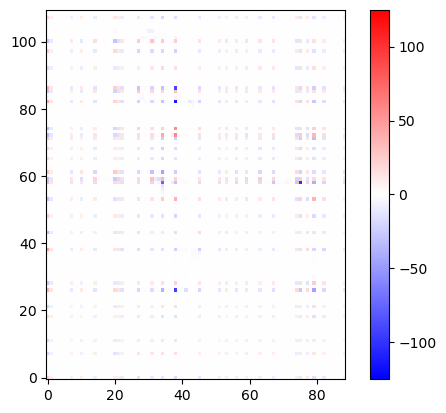

In [10]:
import matplotlib.pyplot as plt

plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-125, vmax=125)
plt.colorbar()
plt.show()

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


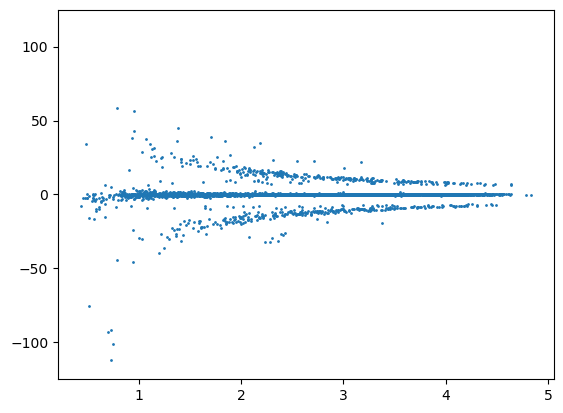

In [11]:
distance = msm.structure.get_distances(molecular_system, selection='all in groups of molecule_name=="Barnase"',
                 selection_2='all in groups of molecule_name=="Barstar"')

plt.scatter(distance.flatten(), U12_groups.flatten(), s=1.0)
plt.ylim([-125.0, 125.0])
plt.show()

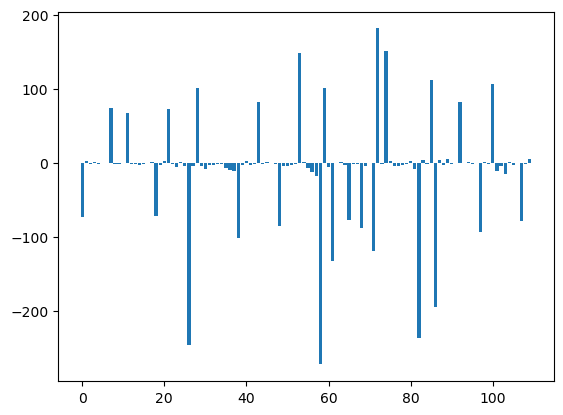

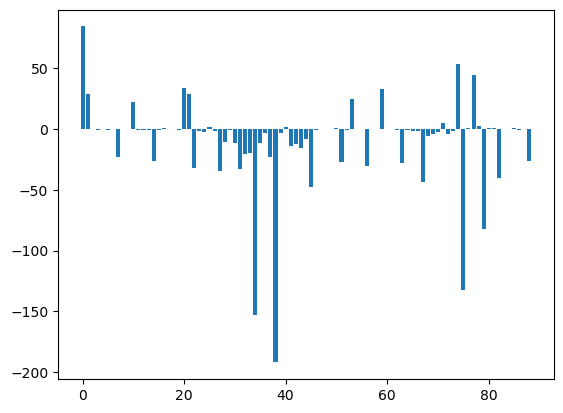

In [12]:
import numpy as np

U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

plt.bar(np.arange(U12_1_groups.shape[0]), msm.pyunitwizard.get_value(U12_1_groups))
plt.show()

plt.bar(np.arange(U12_2_groups.shape[0]), msm.pyunitwizard.get_value(U12_2_groups))
plt.show()

In [13]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all')
msm.thirds.nglview.color_by_value(view, aux, min_value= -max_abs_val, max_value= max_abs_val, cmap='bwr')
view

NGLWidget()